In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import glob
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import umap

In [2]:
files = glob.glob('../data/txt/*.txt')

In [3]:
vec_tfidf = TfidfVectorizer(
    input='filename',
    sublinear_tf=True,
    use_idf=True,
    decode_error='replace',
    norm='l2',
    analyzer='word'
)

vec_count = CountVectorizer(
    input='filename',
    decode_error='replace',
    analyzer='word',
    max_features=100
)

In [6]:
vec = vec_tfidf
X = vec.fit_transform(files)

In [7]:
X

<31x58940 sparse matrix of type '<class 'numpy.float64'>'
	with 133387 stored elements in Compressed Sparse Row format>

In [8]:
df = pd.DataFrame(X.toarray())
df.columns = vec.get_feature_names_out()
df.head()

,10,130,1capite,326b29,327a30,426b,aa,aaa,ab,abacta,...,ὑπὸ,ὕδατι,ὕδωρ,ὠδῖνα,ὠδῖνος,ὡς,ὡστε,ῥιγαλέον,ῥυσμῷ,ῥἀυτὴ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017936,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019715,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# opening the functionwords file

stops = []

with open('../data/functionwords.txt','r') as file:
    for line in file:
        words = line.lower().split()
        for word in words:
            stops.append(word)
            
stops = [s for s in stops if s != '/']
print(stops[:10])

['atqui', 'atqvi', 'autem', 'avtem', 'certe', 'ceu', 'cev', 'confestim', 'cum', 'cvm']


In [10]:
stops_df = df[df.columns.intersection(stops)]

In [11]:
names = [f.split('/')[-1].split('.')[0] for f in files]

In [12]:
names

['BurCom',
 'AristPha',
 'BurInt',
 'AnonMetaph',
 'BurEthN',
 'AristMet',
 'WilMet',
 'JamPhys',
 'WilInPar',
 'BarMun',
 'WilTet',
 'AristPhaP',
 'WilInTim',
 'JamMetaph',
 'BurNemP',
 'WilCael',
 'BurGen',
 'WilHis',
 'AnonPhys',
 'WilElem',
 'WilSimp',
 'JamAnim',
 'WilGenA',
 'BarHom',
 'BurIon',
 'BarPue',
 'BurMat',
 'AristMen',
 'BurMatP',
 'WilAlex',
 'BurEthV']

In [13]:
translators = [re.match('[A-Z][a-z]+', fn)[0] for fn in names]
translators

['Bur',
 'Arist',
 'Bur',
 'Anon',
 'Bur',
 'Arist',
 'Wil',
 'Jam',
 'Wil',
 'Bar',
 'Wil',
 'Arist',
 'Wil',
 'Jam',
 'Bur',
 'Wil',
 'Bur',
 'Wil',
 'Anon',
 'Wil',
 'Wil',
 'Jam',
 'Wil',
 'Bar',
 'Bur',
 'Bar',
 'Bur',
 'Arist',
 'Bur',
 'Wil',
 'Bur']

In [14]:
stops_df.insert(0,'name',names)
stops_df

,name,atqui,autem,avtem,certe,ceu,confestim,cum,cvm,dehinc,...,uidelicet,ut,utique,velut,veluti,velvt,vero,videlicet,vt,vtiqve
0,BurCom,0.000000,0.026574,0.000000,0.013628,0.007296,0.014148,0.019039,0.000000,0.009019,...,0.000000,0.021596,0.024814,0.025245,0.000000,0.000000,0.022796,0.007296,0.000000,0.000000
1,AristPha,0.033849,0.020205,0.000000,0.025545,0.023971,0.005898,0.018417,0.000000,0.018829,...,0.000000,0.018142,0.022341,0.025957,0.021410,0.000000,0.024708,0.012289,0.000000,0.000000
2,BurInt,0.000000,0.028341,0.000000,0.000000,0.009930,0.025798,0.023151,0.000000,0.000000,...,0.000000,0.022167,0.025182,0.019255,0.000000,0.000000,0.035687,0.000000,0.000000,0.000000
3,AnonMetaph,0.020053,0.022551,0.000000,0.008239,0.006217,0.000000,0.015709,0.000000,0.000000,...,0.000000,0.022170,0.000000,0.016683,0.026113,0.000000,0.029345,0.000000,0.000000,0.000000
4,BurEthN,0.000000,0.050084,0.000000,0.012792,0.000000,0.000000,0.022258,0.000000,0.000000,...,0.000000,0.028503,0.046392,0.000000,0.000000,0.000000,0.039802,0.000000,0.000000,0.000000
5,AristMet,0.032992,0.030034,0.000000,0.029325,0.047978,0.000000,0.024564,0.000000,0.015721,...,0.000000,0.028879,0.028444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,WilMet,0.000000,0.027469,0.000000,0.005482,0.000000,0.005691,0.018872,0.000000,0.000000,...,0.000000,0.019711,0.020834,0.009636,0.000000,0.000000,0.000000,0.000000,0.014660,0.000000
7,JamPhys,0.000000,0.030815,0.000000,0.000000,0.000000,0.000000,0.023203,0.000000,0.000000,...,0.000000,0.023493,0.024728,0.000000,0.000000,0.000000,0.029302,0.007615,0.000000,0.000000
8,WilInPar,0.000000,0.014162,0.027518,0.000000,0.000000,0.004413,0.009886,0.014710,0.003965,...,0.017766,0.011981,0.013448,0.004413,0.003965,0.004993,0.007081,0.000000,0.021191,0.032652
9,BarMun,0.000000,0.041728,0.000000,0.000000,0.000000,0.023095,0.021274,0.000000,0.000000,...,0.000000,0.024696,0.029625,0.000000,0.000000,0.000000,0.042871,0.013543,0.000000,0.000000


In [15]:
stops_df.to_csv('../data/stops_df.csv')

In [16]:
# Dimension reduction and clustering with UMAP.

umap_results = pd.DataFrame(stops_df['name'])
umapper = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine',
    # UMAP figures change with every run if not seeded
    random_state=42
)

u = umapper.fit_transform(stops_df.drop(['name'],axis=1))
umap_results['X'], umap_results['Y'] =  u[:,0], u[:,1]
umap_results['translator'] = translators # will be used for colouring

In [17]:
umap_results

,name,X,Y,translator
0,BurCom,-5.965688,-0.376516,Bur
1,AristPha,-5.402012,-0.703949,Arist
2,BurInt,-5.885358,0.059665,Bur
3,AnonMetaph,-4.660290,-1.206720,Anon
4,BurEthN,-4.619668,-3.423098,Bur
5,AristMet,-5.029665,-0.460390,Arist
6,WilMet,-3.267993,-0.877273,Wil
7,JamPhys,-4.222079,-1.679989,Jam
8,WilInPar,-2.905898,-0.321475,Wil
9,BarMun,-4.247509,-2.645847,Bar


In [18]:
!pip install rpy2

In [36]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


R[write to console]: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y,  : 
  polygon edge not found

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y,  :
R[write to console]: 
 
R[write to console]:  no font could be found for family "Envy Code R"

R[write to console]: 2: 
R[write to console]: In grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y,  :
R[write to console]: 
 
R[write to console]:  no font could be found for family "Envy Code R"



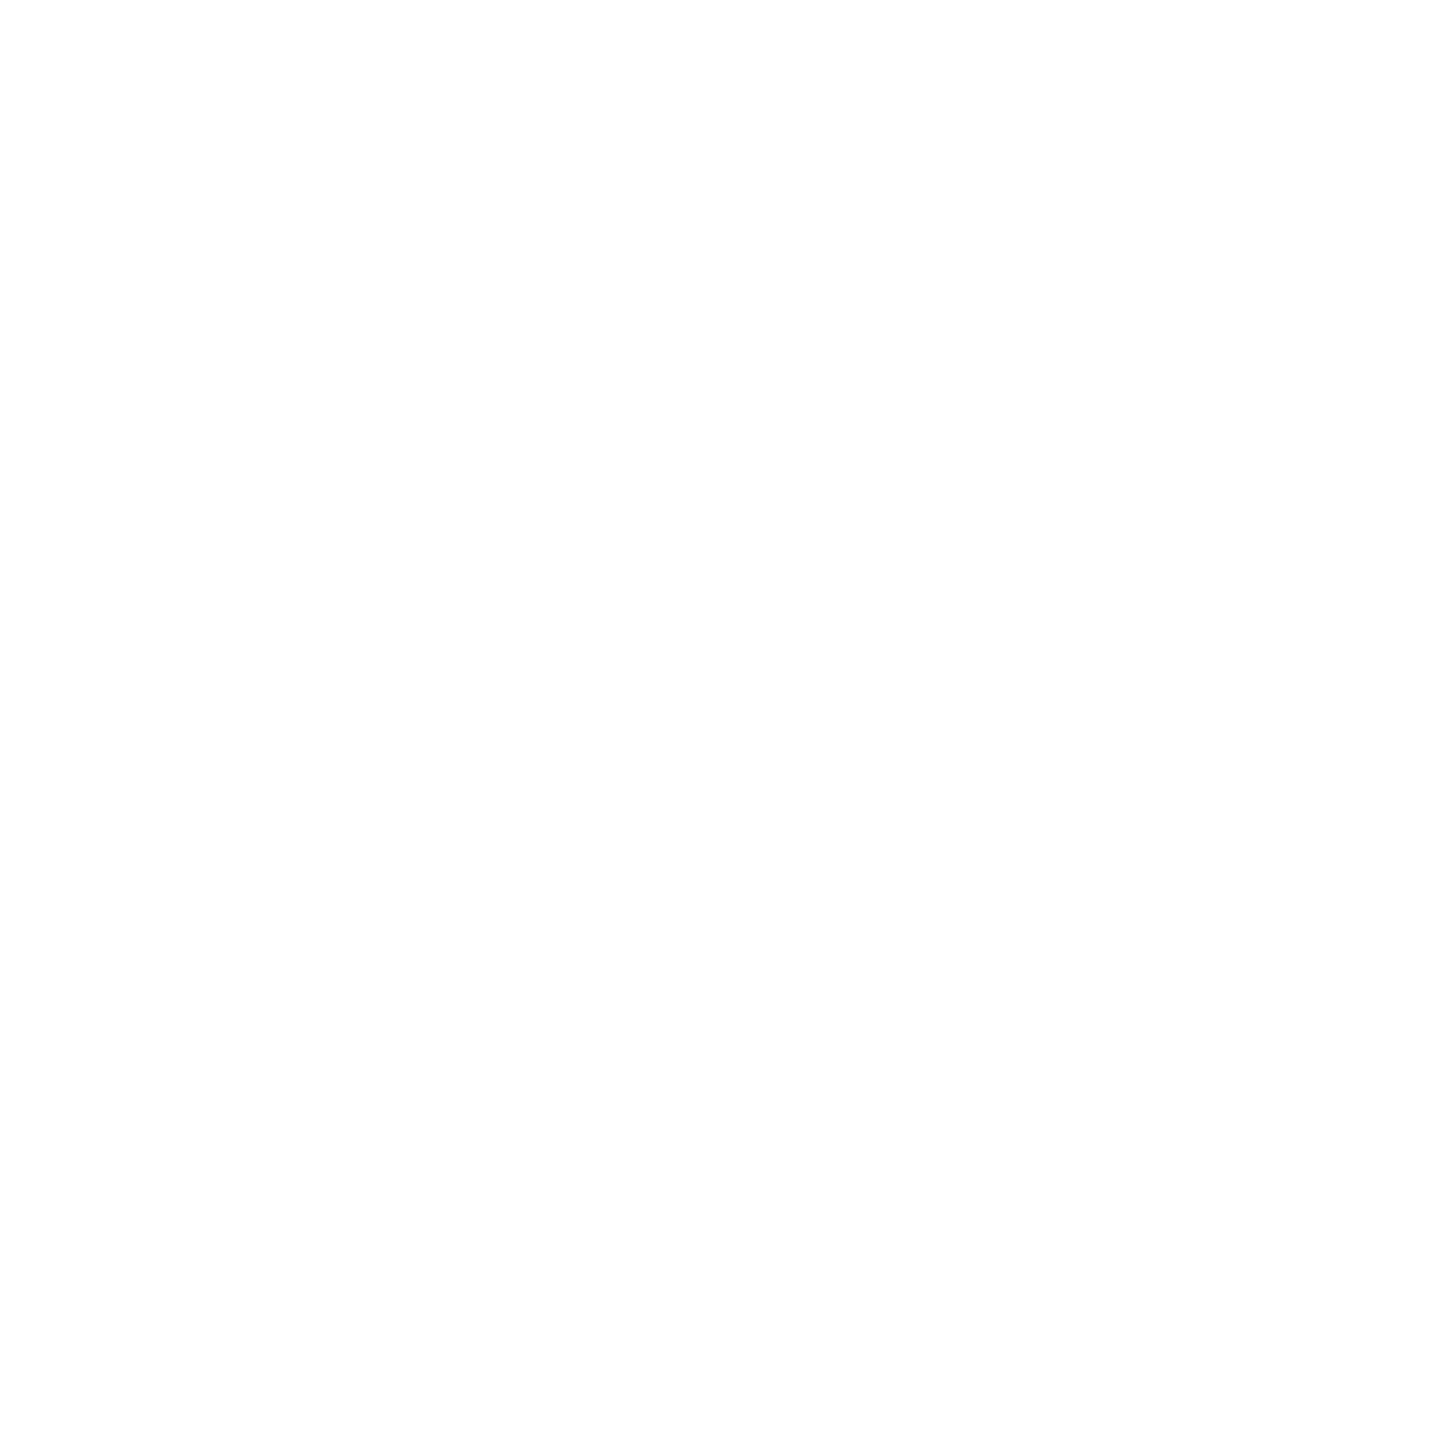

RRuntimeError: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y,  : 
  polygon edge not found


In [40]:
%%R -i umap_results -h 10 -w 10 -u in -r 144

library(ggforce)
library(ggsci)
library(extrafont)
source('theme_black.R')
pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

ggplot(data=umap_results,aes(x=X, y=Y)) +
geom_voronoi_tile(aes(fill = translator, group = -1L, ), max.radius = 0.5,
                    colour = 'black', expand = unit(-0.1, 'mm'), 
                    radius = unit(1.5, 'mm')) +
scale_fill_manual(values=pal) +


theme_black() +
theme(
    plot.title = element_text(margin = margin(b = 50)),
    panel.border = element_blank()
) +
guides(fill = guide_legend(ncol=2, override.aes = aes(size=12))) +
theme(legend.title=element_blank(), legend.position= c(0.15, 0.1), legend.text=element_text(size=16)) +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
theme(text = element_text(size=20, family="Envy Code R"), panel.grid.minor=element_blank(), panel.grid.major=element_blank())

In [35]:
dfs = []
X,y = stops_df.drop('name',axis=1), stops_df['name']
# make 100 KNN graphs using a random subset of 20 features
for _ in range(100):
    this_X = X.sample(20,axis=1)
    #cl = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis',metric_params={'V': np.cov(this_X.T)})
    cl = KNeighborsClassifier(n_neighbors=3, metric='cosine')
    cl.fit(this_X,y)
    dists,indices = cl.kneighbors(n_neighbors=3)
    dicts = []
    for i, node_ary in enumerate(indices):
        for j, node in enumerate(node_ary):
            dicts.append({
                'from': y[i],
                'to': y[node],
                # neighbors are sorted low distance to high
                # so this gives us the 'inverse rank' ie lowest
                # distance of n neighbors scores n, next is n-1 etc
                # this is consistent with the stylo BCT algorithm
                'weight': (len(node_ary)-j)
            })
    dfs.append(pd.DataFrame(dicts))

# now merge all the graphs by adding the edge weights
consensus = pd.concat(dfs).groupby(['from','to'],as_index=False).agg(sum)

In [23]:
consensus

NameError: name 'consensus' is not defined

In [18]:
# trim to taste, otherwise it's very noisy
consensus = consensus[consensus['weight'] >= 25]

In [ ]:
%%R -i consensus  -h 10 -w 10 -u in -r 144

library(tidygraph)
library(ggraph)
library(stringr)
source('/Users/ben/r/theme_black.R')
pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

set.seed(42)
gr1 <- as_tbl_graph(consensus)
# Plot
gr1 %>%
    activate(nodes) %>%
    mutate(transl = str_match(name, '[A-Z][a-z]+')) %>%
    ggraph(layout = 'fr') + 
    geom_edge_fan2(aes(width=weight,color=node.transl,alpha=weight),strength=2,show.legend=FALSE) + 
    geom_node_label(
        label.size=NA,
        size = 3.5,
        family="Envy Code R",
        aes(fill=transl, label=name),
    ) +
    scale_fill_manual(values=pal) +
    scale_color_manual(values=pal) +
    scale_edge_color_manual(values=pal) +
    scale_edge_width(range=c(0.5,7)) +
    scale_edge_alpha(range=c(0.2,1)) +
    theme_black() +
    theme(
        plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank()
    ) +
    theme(legend.position='none') +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
            axis.ticks.y=element_blank()) +
    theme(text = element_text(family="Envy Code R"),panel.grid.minor=element_blank(), panel.grid.major=element_blank())

### Using Networkx for python

In [30]:
import networkx as nx
G = nx.from_pandas_edgelist(consensus, source='from', target='to', edge_attr=True)

In [31]:
pos = nx.drawing.layout.spring_layout(G)
nx.set_node_attributes(G, pos, 'pos')

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [32]:
G.nodes._nodes

{'AnonMetaph': {'pos': array([0.46671234, 0.05677404])},
 'AnonPhys': {'pos': array([ 0.40989528, -0.26487788])},
 'AristMen': {'pos': array([0.76923805, 0.50784966])},
 'AristPha': {'pos': array([0.51695918, 0.553166  ])},
 'JamAnim': {'pos': array([0.98431398, 0.00127835])},
 'JamMetaph': {'pos': array([ 0.92825921, -0.15877547])},
 'JamPhys': {'pos': array([ 0.69615722, -0.05960849])},
 'WilSimp': {'pos': array([-0.08117798, -0.38407193])},
 'AristMet': {'pos': array([0.49919688, 0.27622347])},
 'BurIon': {'pos': array([0.09063085, 0.52604101])},
 'WilElem': {'pos': array([ 0.19330531, -0.86972879])},
 'WilInTim': {'pos': array([ 0.04217789, -0.40716185])},
 'WilMet': {'pos': array([-0.25111419, -0.49996694])},
 'WilTet': {'pos': array([-0.04822681, -0.64831858])},
 'BurMat': {'pos': array([-0.12124584,  0.48857759])},
 'AristPhaP': {'pos': array([0.55824844, 0.40010474])},
 'BurInt': {'pos': array([-0.15274504,  0.87444998])},
 'BurNemP': {'pos': array([-0.32448156,  0.4745592 ])},